# Exploratory Data Analysis

## Automobile Dataset

### Problem Statement :

This dataset consist of data From 1985 Ward's Automotive Yearbook. It consists of three types of entities:
- The specification of an auto in terms of various characteristics
- Its assigned insurance risk rating 
- Its normalized losses in use as compared to other cars.



### About the DataSet :

Below are the features in the dataset and their description

|Features|Description|
|-----|-----|
|symboling|It is a risk factor symbol associated to the price & corresponds to the degree to which an automobile is more risky than its price indicates. +3 indicates risky, -3 indicates safety|
|make|Indicates the maker or manufacturer of the automobile|
|fuel-type|Indicates the type of fuel - diesel or gas|
|body-style|Indicates whether the body shape of automobile is a hardtop, wagon, sedan, hatchback or convertible|
|drive-wheels|Indicates the configuration of drive wheels for the automobile|
|wheel-base|It is the distance between the centers of the front wheel and the rear wheel. It is continuous ranging from 86.6 120.9|
|length|Indicates length of the automobile and ranges from 141.1 to 208.1.|
|width|Indicates width of the automobile and ranges from 60.3 to 72.3|
|height|Indicates the width of the automobile and ranges 47.8 to 59.8|
|horsepower|Maximum horsepower the automobile engine can output and ranges from 48 to 288|
|peak-rpm|RPM is a way to measure how many times per minute components in the engine rotate. It ranges from 4150 to 6600|
|highway-mpg|Indicates the miles per galon typically consumed at highways. It is continuous from 4150 to 6600|
|city-mpg|Indicates the miles per galon typically consumed at cities. It is continuous from 13 to 49|
|price|Indicates the price of the automobile and ranges from 5118 to 45400|
|normalized-losses|It is a continuous variable ranging from 65 to 256|
|engine-location|Indicates the location of the engine - front or rear|
|engine-type|Indicates the type of engine.|
|engine-size|It is continuous from 61 to 326|

### Load and understand your data
- The data consists of 205 instances and 14 features

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import Imputer,LabelEncoder
from scipy.stats import norm, skew
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../data/Automobile_data1.csv')
df.head()

,symboling,make,fuel-type,body-style,drive-wheels,wheel-base,length,width,height,horsepower,peak-rpm,highway-mpg,city-mpg,price
0,3,alfa-romero,gas,convertible,rwd,88.6,168.8,64.1,48.8,111,5000,27,21,13495
1,3,alfa-romero,gas,convertible,rwd,88.6,168.8,64.1,48.8,111,5000,27,21,16500
2,1,alfa-romero,gas,hatchback,rwd,94.5,171.2,65.5,52.4,154,5000,26,19,16500
3,2,audi,gas,sedan,fwd,99.8,176.6,66.2,54.3,102,5500,30,24,13950
4,2,audi,gas,sedan,4wd,99.4,176.6,66.4,54.3,115,5500,22,18,17450


### Check the number of null values in each column get a general description of your data

In [3]:
df.isna().any()

symboling       False
make            False
fuel-type       False
body-style      False
drive-wheels    False
wheel-base      False
length          False
width           False
height          False
horsepower      False
peak-rpm        False
highway-mpg     False
city-mpg        False
price           False
dtype: bool

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
symboling       205 non-null int64
make            205 non-null object
fuel-type       205 non-null object
body-style      205 non-null object
drive-wheels    205 non-null object
wheel-base      205 non-null float64
length          205 non-null float64
width           205 non-null float64
height          205 non-null float64
horsepower      205 non-null int64
peak-rpm        205 non-null int64
highway-mpg     205 non-null int64
city-mpg        205 non-null int64
price           205 non-null int64
dtypes: float64(4), int64(6), object(4)
memory usage: 22.5+ KB


In [5]:
df.describe()

,symboling,wheel-base,length,width,height,horsepower,peak-rpm,highway-mpg,city-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,104.936585,5127.804878,30.751220,25.219512,13476.258537
std,1.245307,6.021776,12.337289,2.145204,2.443522,40.609702,478.414007,6.886443,6.542142,8114.166248
min,-2.000000,86.600000,141.100000,60.300000,47.800000,48.000000,4150.000000,16.000000,13.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,70.000000,4800.000000,25.000000,19.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,95.000000,5200.000000,30.000000,24.000000,10595.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,116.000000,5500.000000,34.000000,30.000000,16558.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,288.000000,6600.000000,54.000000,49.000000,45400.000000


### Plot a histogram showing the distribution of the car prices (target variable) and if any skewness, print the value of skewness

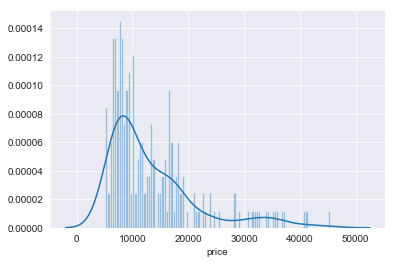

In [6]:
sns.set_style("darkgrid")
sns.distplot(df['price'], bins = 100, kde = True)

In [7]:
skew(df['price']), df['price'].skew()

(1.671975747887442, 1.684325214046249)

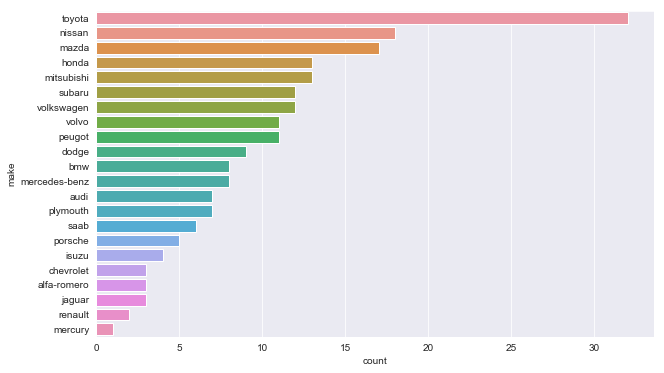

In [8]:
plt.figure(figsize = (10, 6))
# sns.countplot(df['make'])
sns.countplot(y = 'make', data = df, order = df['make'].value_counts().index)

### Plot a jointplot that shows the relationship between the 'horsepower' and 'price' of the car.

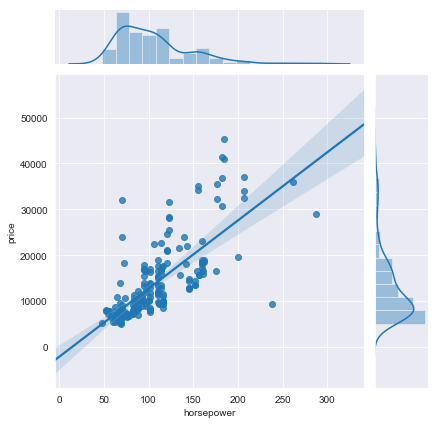

In [9]:
sns.jointplot(x = 'horsepower', y = 'price', data = df, kind = 'reg')
#sns.lmplot(x = 'horsepower', y = 'price', data = df)

### Plot the insurance risk ratings for all the automobiles

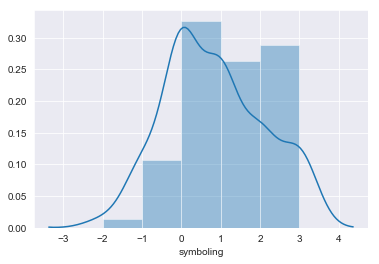

In [10]:
sns.distplot(df['symboling'], bins = 5)

In [11]:
#sns.countplot(df['symboling'])

### Plot a pie chart of the fuel-type of the automobiles

In [12]:
x = df['fuel-type'].value_counts()

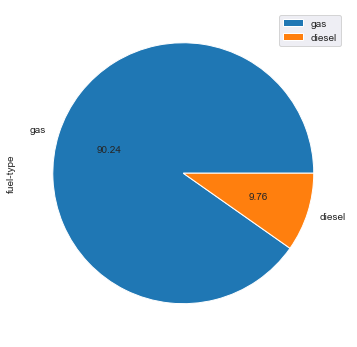

In [13]:
x.plot.pie(figsize = (10, 6), legend = True, autopct='%.2f')

### Plot the pearson correlation of all the features in a heatmap.

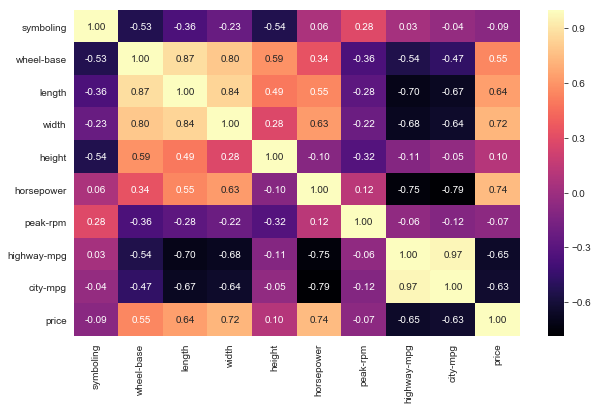

In [14]:
plt.figure(figsize = (10, 6))
sns.heatmap(data = df.corr(), annot = True, fmt = '.2f', cmap = 'magma')

### Plot a boxplot that shows the variability of each 'body-style' with respect to the 'price'.

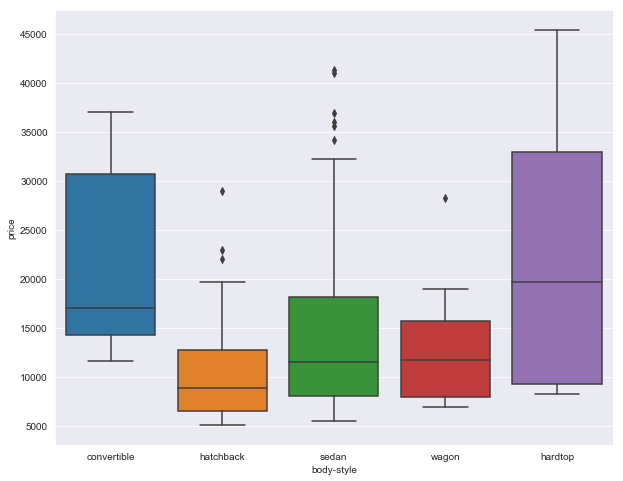

In [15]:
plt.figure(figsize = (10, 8))
sns.boxplot(y = 'price', x = 'body-style', data = df)

### Plot a boxplot showing the variablity in the 'price' for each 'make' of the car 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

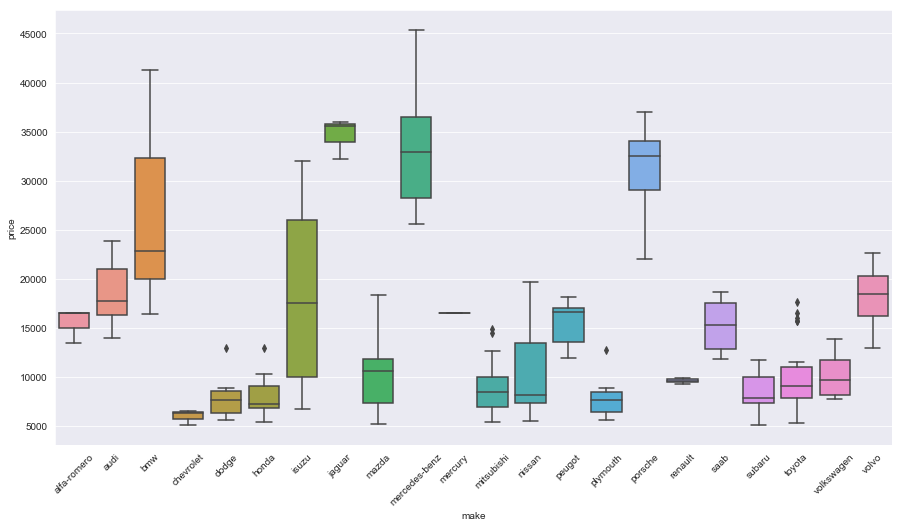

In [16]:
plt.figure(figsize = (15, 8))
sns.boxplot(y = 'price', x = 'make', data = df)
plt.xticks(rotation = 45)

### Plot a countplot of the 'make' column of the dataset which represents the different car makers.

## Data Preprocessing for the Automobile dataset

In [161]:
automobile = pd.read_csv('../data/Automobile_data.csv')
automobile.head()
#y = automobile[["price"]]
#automobile.drop("price",1,inplace=True)

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


### Find out number of records having '?' value for normalized losses

In [162]:
automobile[automobile['normalized-losses'] == '?']['normalized-losses'].count()

41

### Impute the missing values of the numerical data with mean of the column (`normalized-losses and horsepower`)  (Make sure you replace "?" by "NaN" for entire dataset before Imputing).

In [163]:
automobile.replace('?', np.nan, inplace = True)

In [164]:
type(np.array(automobile[['normalized-losses']]))

numpy.ndarray

In [165]:
imp = Imputer(missing_values = np.nan, strategy = 'mean')
automobile['normalized-losses'] = imp.fit_transform(np.array(automobile[['normalized-losses']]))
automobile['horsepower'] = imp.fit_transform(np.array(automobile[['horsepower']]))

In [166]:
automobile.isna().any()

symboling            False
normalized-losses    False
make                 False
fuel-type            False
body-style           False
drive-wheels         False
engine-location      False
width                False
height               False
engine-type          False
engine-size          False
horsepower           False
city-mpg             False
highway-mpg          False
price                False
dtype: bool


### Check the skewness of the numeric features and apply square root transformation on features with skewness greater than 1.

In [167]:
numeric_automobile = automobile.select_dtypes(include=['float64', 'int64'])

#automobile._get_numeric_data().columns

In [168]:
for col in numeric_automobile :
    print('Feature : {}, Skewness : {:.2f}'.format(col, skew(numeric_automobile[col])))

Feature : symboling, Skewness : 0.21
Feature : normalized-losses, Skewness : 0.85
Feature : width, Skewness : 0.90
Feature : height, Skewness : 0.06
Feature : engine-size, Skewness : 1.93
Feature : horsepower, Skewness : 1.39
Feature : city-mpg, Skewness : 0.66
Feature : highway-mpg, Skewness : 0.54
Feature : price, Skewness : 1.79


In [169]:
for col in numeric_automobile :
    if skew(numeric_automobile[col]) > 1 :
        automobile[col] = np.sqrt(automobile[col])

In [170]:
for col in numeric_automobile :
    print(col, skew(numeric_automobile[col]))

symboling 0.20952469094997359
normalized-losses 0.8485348696008058
width 0.8973753485201392
height 0.06265991683394276
engine-size 1.9333748457840114
horsepower 1.3875147343096037
city-mpg 0.6588377533622138
highway-mpg 0.5360379305163596
price 1.791937476907277


In [171]:
for col in numeric_automobile :
    print('Feature : {}, Skewness : {:.2f}'.format(col, skew(automobile[col])))

Feature : symboling, Skewness : 0.21
Feature : normalized-losses, Skewness : 0.85
Feature : width, Skewness : 0.90
Feature : height, Skewness : 0.06
Feature : engine-size, Skewness : 1.35
Feature : horsepower, Skewness : 0.88
Feature : city-mpg, Skewness : 0.66
Feature : highway-mpg, Skewness : 0.54
Feature : price, Skewness : 1.21


### Combine the 'height' and 'width' to make a new feature 'area' of the frame of the car.

In [172]:
automobile.insert(9, 'area', np.nan)

In [173]:
automobile['area'] = automobile['height'] * automobile['width']

In [174]:
automobile.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,area,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,3128.08,dohc,11.401754,10.535654,21,27,116.167982
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,3128.08,dohc,11.401754,10.535654,21,27,128.452326
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,3432.20,ohcv,12.328828,12.409674,19,26,128.452326
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,3594.66,ohc,10.440307,10.099505,24,30,118.110118
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,3605.52,ohc,11.661904,10.723805,18,22,132.098448



###  Label Encode the categorical features.


In [175]:
LabEncoder = LabelEncoder()

In [176]:
automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
symboling            205 non-null int64
normalized-losses    205 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
width                205 non-null float64
height               205 non-null float64
area                 205 non-null float64
engine-type          205 non-null object
engine-size          205 non-null float64
horsepower           205 non-null float64
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                205 non-null float64
dtypes: float64(7), int64(3), object(6)
memory usage: 25.7+ KB


In [177]:
categorical_feature = automobile.select_dtypes(include = object)

In [178]:
for cols in categorical_feature:
    automobile[cols] = LabEncoder.fit_transform(automobile[[cols]])

In [180]:
automobile.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,area,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,0,1,0,2,0,64.1,48.8,3128.08,0,11.401754,10.535654,21,27,116.167982
1,3,122.0,0,1,0,2,0,64.1,48.8,3128.08,0,11.401754,10.535654,21,27,128.452326
2,1,122.0,0,1,2,2,0,65.5,52.4,3432.20,5,12.328828,12.409674,19,26,128.452326
3,2,164.0,1,1,3,1,0,66.2,54.3,3594.66,3,10.440307,10.099505,24,30,118.110118
4,2,164.0,1,1,3,0,0,66.4,54.3,3605.52,3,11.661904,10.723805,18,22,132.098448


In [183]:
#one-hot encoding
df1 = pd.DataFrame({'A': ['a', 'b', 'c']}, {'B' : ['b', 'b', 'c']}, {'C' : [1, 2, 3]})

In [184]:
df1

,C
B,NaN


### Split the Independent features and target(`price`) variable into X and y. 

In [185]:
X = automobile.drop('price', 1)
y = automobile['price']

### Split X and y into training and validation data and apply the Linear regression Model

In [ ]:
from sklearn.model import 

### Print the different evaluation metrics like Mean Squared error, R2 Score, Mean Absolute Error and RMSE

# Thank You
***
### Next Session: Logistic Regression
For more queries - Reach out to academics@greyatom.com 